# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision

#### Elias Nehme

## Tutorial 08 - Uncertainty Quantification in Deep Learning
---

## <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Why We Need Uncertainty?](#-Why-We-Need-Uncertainty?)
* [Types of Uncertainty](#-Types-of-Uncertainty)
    * [Epistemic/Model Uncertainty](#-Epistemic/Model-Uncertainty)
    * [Aleatoric/Data Uncertainty](#-Aleatoric/Data-Uncertainty)
* [Computing Uncertainty](#-Computing-Uncertainty)
    * [Likelihood Modelling](#-Likelihood-Modelling)
    * [Bayesian Neural Networks](#-Bayesian-Neural-Networks)
    * [Evidental Deep Learning](#-Evidental-Deep-Learning)
* [Computer Vision Applications](#-Computer-Vision-Applications)
* [Existing Libraries](#-Blitz---Bayesian-Neural-Networks-in-PyTorch)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/doodle/96/000000/average-value.png" style="height:50px;display:inline"> Why We Need Uncertainty?
--- 

<img src="./assets/dice.gif" width="400">

* <a href="http://introtodeeplearning.com/">Image source</a>

#### With great power..
---

<img src="./assets/uncertainty_why4.jpg" width="400">

* Control handed-over to automated systems; with many dangerous scenarios
    * Medical diagnosis
    * Automotive and Self-driving Cars
    * High frequency Trading (affecting economic markets on global scale)
    * etc.

* <a href="http://www.cs.ox.ac.uk/people/yarin.gal/website/bdl101/MLSS_2019_BDL_1.pdf">Image source</a>

#### Knowing what you don't know
---
* A deep learning model should be able to say: “sorry, I don’t know”
* If it can tell us how certain it is we can plan accordingly

<img src="./assets/uncertainty_why1.jpg" width="1200">

* <a href="https://www.slideshare.net/perone/uncertainty-estimation-in-deep-learning/5">Image source</a>

#### Diagnosis in medicine
---
* Suppose you are trying to classify lesions in MRI

<img src="./assets/uncertainty_why2.jpg" width="1200">

* Later on: change in acquisition setup leads to differently looking samples
* Problem: we will still get predictions with **high probability** for an Out-of-distrbution (OOD) sample.
* <a href="https://www.slideshare.net/perone/uncertainty-estimation-in-deep-learning/7">Image source</a>

#### Out-of-distribution detection
---
* Systems applied to toy data deployed in real-life settings

<img src="./assets/uncertainty_why9.jpg" width="1200">

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### Out-of-distribution detection
---
* Likelihood vs confidence

<img src="./assets/uncertainty_why10.jpg" width="1200">

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### Out-of-distribution detection
---
* Likelihood vs confidence

<img src="./assets/uncertainty_why11.jpg" width="1200">

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### Out-of-distribution detection
---
* Likelihood vs confidence

<img src="./assets/uncertainty_why12.jpg" width="1200">

* Classifier forced to choose between 2 possible outcomes even if it have no clue
* July 2015, classification system erroneously identified two African American humans as gorillas, raising concerns of racial discrimination.

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### Autonomous Driving
---
* Semantic Segmentation used as a strong cue for motion planning

<img src="./assets/uncertainty_why5.jpg" width="1200">

* <a href="http://www.cs.ox.ac.uk/people/yarin.gal/website/bdl101/MLSS_2019_BDL_1.pdf">Image source</a>

#### Autonomous Driving
---
* Ground Truth Segmentation Labels

<img src="./assets/uncertainty_why6.jpg" width="1200">

* <a href="http://www.cs.ox.ac.uk/people/yarin.gal/website/bdl101/MLSS_2019_BDL_1.pdf">Image source</a>

#### Autonomous Driving
---
* Predicted Segmentation Labels

<img src="./assets/uncertainty_why7.jpg" width="1200">

* <a href="http://www.cs.ox.ac.uk/people/yarin.gal/website/bdl101/MLSS_2019_BDL_1.pdf">Image source</a>

#### Autonomous Driving
---
* Predicted Uncertainty per-pixel

<img src="./assets/uncertainty_why8.jpg" width="1200">

* May 2016, tragically experienced the first fatality from an assisted driving system. White side of tractor trailer confused against a brightly lit sky.
* <a href="http://www.cs.ox.ac.uk/people/yarin.gal/website/bdl101/MLSS_2019_BDL_1.pdf">Image source</a>

#### Active learning
---
* Agent chooses which unlabelled data is most informative
* Asks external \oracle" (eg human annotator) for a label only for that
* Acquisition function: ranks points based on their potential informativeness, e.g. model uncertainty

<img src="./assets/uncertainty_why3.jpg" width="1200">

* <a href="http://www.cs.ox.ac.uk/people/yarin.gal/website/bdl101/MLSS_2019_BDL_2.pdf">Image source</a>

* Many more applications including:
    * Explore/exploit dilemma in Reinforcement Learning
    * Model understanding/Dataset bias understanding
    * Sample-adaptive loss-function tuning
    * etc

### <img src="https://img.icons8.com/officexs/60/000000/area-chart.png" style="height:50px;display:inline"> Types of Uncertainty
--- 
* Epistemic/Model Uncertainty
* Aleatoric/Data Uncertainty

#### <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> Epistemic/Model Uncertainty
--- 
* Episteme in Latin is "Knowledge/understanding"
* Also called model uncertaintly or reducible uncertainty
* Describes the uncertainty in the model itself (network weights)
* High when we do not have good coverage of the sample space
* Can be reduced with more training data

<img src="./assets/uncertainty_types3.png" width="800">

* Cool online demo for epistemic uncertainty: https://mlg.eng.cam.ac.uk/yarin/blog_3d801aa532c1ce.html

#### <img src="https://img.icons8.com/ios/60/000000/area-chart.png" style="height:50px;display:inline"> Aleatoric/Data Uncertainty
--- 
* Aleator in Latin means "dice player"

<img src="./assets/uncertainty_types2.png" width="400">

* Rolling a pair of dice again and again will not reduce the uncertainty
* <a href="http://www.cs.ox.ac.uk/people/yarin.gal/website/bdl101/MLSS_2019_BDL_2.pdf">Image source</a>

#### <img src="https://img.icons8.com/ios/60/000000/area-chart.png" style="height:50px;display:inline"> Aleatoric/Data Uncertainty
--- 
* Also called data uncertainty or irreducible uncertainty
* Describes the confidence in the input data
* High when the input data is noisy
* Can not be reduced by adding more training data
* To decrease it, we need to acquire data with a better sensor (less noise)
* Further classified into: 
    * homoscedastic - fixed for all samples
    * heteroscedastic - sample-dependent noise

#### Visual Example 1
--- 

<img src="./assets/uncertainty_types1.png" width="1200">

* Data generation model is given by $y_i = \omega_0 + \omega_1 x_i + \epsilon$
* Here we have heteroscedastic data uncertainty since $\epsilon = \epsilon(x_i)$

* <a href="https://towardsdatascience.com/my-deep-learning-model-says-sorry-i-dont-know-the-answer-that-s-absolutely-ok-50ffa562cb0b#:~:text=There%20are%20two%20major%20different,epistemic%20uncertainty%20and%20aleatoric%20uncertainty.&text=Epistemic%20uncertainty%20describes%20what%20the,to%20limited%20data%20and%20knowledge.">Image source</a>

#### Visual Example 2
--- 

<img src="./assets/uncertainty_types4.png" width="1200">

* Extrapolation is an obvious case of high epistemic uncertainty
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

### <img src="https://img.icons8.com/office/80/000000/abacus.png" style="height:50px;display:inline"> Computing Uncertainty
---
* Likelihood Modelling
* Bayesian Neural Networks
* Dropout at Test time
* Evidental Deep Learning

#### <img src="https://img.icons8.com/pastel-glyph/64/000000/increase-profits.png" style="height:50px;display:inline"> Likelihood Modelling
--- 

<img src="./assets/uncertainty_mle1.png" width="1200">

* Main idea is simple: swap point estimate with parameterized likelihood
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/pastel-glyph/64/000000/increase-profits.png" style="height:50px;display:inline"> Likelihood Modelling: Classification
--- 

<img src="./assets/uncertainty_mle2.png" width="1200">

* Classification: Output is a probability distribution with Softmax and Cross-entropy
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/pastel-glyph/64/000000/increase-profits.png" style="height:50px;display:inline"> Likelihood Modelling: Classification
--- 

<img src="./assets/uncertainty_mle3.png" width="1200">

* Underlying assumption is that the output is Categorially distributed
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/pastel-glyph/64/000000/increase-profits.png" style="height:50px;display:inline"> Likelihood Modelling: Regression
--- 

<img src="./assets/uncertainty_mle4.png" width="1200">

* Same logic only assume the output is Gaussian
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/pastel-glyph/64/000000/increase-profits.png" style="height:50px;display:inline"> Likelihood Modelling: Regression
---

* Where are the uncertainty "labels" coming from?
    * We do not need labels for uncertainty!
* The negative log-likelihood for a Gaussian distribution is composed of 2 terms ($\hat{y}\equiv \mu$):
$$-\log\left(\mathcal{N}\left(y\lvert \mu, \sigma^2\right)\right) = \frac{1}{2} \frac{\left(y - \hat{y}\left(x\right)\right)^2}{\hat{\sigma}^2\left(x\right)} + \frac{1}{2} \log\left(\hat{\sigma}^2\left(x\right)\right) + C$$
* The first term favors very large uncertainty
* The second term favors very small uncertainty
* The compromise is reached such that for small errors the uncertainty is small
* Note that this requires another head for the net (to output sigma)

#### <img src="https://img.icons8.com/pastel-glyph/64/000000/increase-profits.png" style="height:50px;display:inline"> Likelihood Modelling: Summary
---

<img src="./assets/uncertainty_mle5.png" width="1200">

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/officel/40/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Bayesian Neural Networks
---

<img src="./assets/uncertainty_bnn5.png" width="1200">

* Epistemic uncertainty is significantly harder to estimate

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/officel/40/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Bayesian Neural Networks: key idea
---

<img src="./assets/uncertainty_bnn4.png" width="1200">

* Main idea: put probability distrbutions over weights

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/officel/40/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Bayesian Neural Networks: intractable directly
---

<img src="./assets/uncertainty_bnn6.png" width="1200">

* Straighforward Bayesian inference is intractable

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/officel/40/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Bayesian Neural Networks: stochastic variational inference
---

* The underlying approximations rely on "Stochastic Variational Inference".
* The posterior is approximated using a parametric distrbution (eg Gaussian)
* Optimization is performed using the "evidence lower bound" (ELBO)
* "Monte Carlo" (MC) Integration is involved to approximate the gradients.
* Still becomes extremely heavy for very large models.

#### <img src="https://img.icons8.com/officel/40/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Bayesian Neural Networks: Efficient approximations
---

<img src="./assets/uncertainty_bnn7.png" width="1200">

* What? Dropout at test time? 

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="assets/dropout_icon.png" style="height:50px;display:inline"> Dropout at Inference 
--- 

* It can be proven that Dropout with L2 weight decay = approximate Bayesian inference of a Gaussian process.
* Main idea: Dropout **both** at **training** and at **test** time.
* Intuition: Training $2^m$ different models simultaneously, where $m$ is the number of nodes in the network. 
* For each batch, a randomly sampled set of these models is trained.

<img src="assets/dropout_mc.gif" style="height:500px">

* <a href="https://www.yuritan.nl/posts/prediction_uncertainty/">Image source</a>
* <a href="https://jmlr.org/papers/v15/srivastava14a.html">Icon source</a>

### <img src="https://img.icons8.com/cotton/64/000000/combo-chart--v1.png" style="height:50px;display:inline"> Evidental Deep Learning
--- 

<img src="./assets/uncertainty_el1.png" width="1200">

* There is a need for a single-pass model that is able to provide both uncertainties 

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

### <img src="https://img.icons8.com/cotton/64/000000/combo-chart--v1.png" style="height:50px;display:inline"> Evidental Deep Learning
--- 

<img src="./assets/uncertainty_el2.png" width="1200">

* Each model from the ensemble leads to a single point $\left(\mu, \sigma^2\right)$
* The model uncertainty is then given by the variance of $\mu$ - $Var\left[\mu\right]$

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

### <img src="https://img.icons8.com/cotton/64/000000/combo-chart--v1.png" style="height:50px;display:inline"> Evidental Deep Learning
--- 

<img src="./assets/uncertainty_el3.png" width="1200">

* Ultimately we are interested in the marginal distributions over $\mu$ and $\sigma$ 

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

### <img src="https://img.icons8.com/cotton/64/000000/combo-chart--v1.png" style="height:50px;display:inline"> Evidental Deep Learning
--- 

<img src="./assets/uncertainty_el4.png" width="1200">

* Key idea: Instead of training ensemble of models to output scalars $\mu$ and $\sigma$, output their distributions directly

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

### <img src="https://img.icons8.com/cotton/64/000000/combo-chart--v1.png" style="height:50px;display:inline"> Evidental Deep Learning
--- 

<img src="./assets/uncertainty_el5.png" width="1200">

* For Classification: The prior will be on the individual probabilities

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

### <img src="https://img.icons8.com/cotton/64/000000/combo-chart--v1.png" style="height:50px;display:inline"> Evidental Deep Learning
--- 

<img src="./assets/uncertainty_el6.png" width="1200">

* Key idea: Instead of training ensemble of models to output scalars, output nested distributions directly
* The previous choices are not random, stem from "conjugate priors" in Bayesian analysis:
    * If posterior and prior are in the same "probability distribution family" (eg exponential) then the prior is said to be conjugate to the likelihood.
    * Examples include: Poisson Likelihood-Gamma Prior, Categorial Likelihood-Dirichlet Prior,...

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

### <img src="https://img.icons8.com/cotton/64/000000/combo-chart--v1.png" style="height:50px;display:inline"> Evidental Deep Learning
--- 

<img src="./assets/uncertainty_el7.png" width="1200">

* Pytorch implementation: https://github.com/dougbrion/pytorch-classification-uncertainty
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

### <img src="https://img.icons8.com/ios/50/000000/summary-list.png" style="height:50px;display:inline"> Techniques - Summary
---

<img src="./assets/uncertainty_comparison.png" width="1200">

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

### <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> Computer Vision Applications
--- 


#### <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> Application 1: Out-of-distribution detection
--- 

<img src="./assets/uncertainty_app1.png" width="1200">

* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> Application 1: Out-of-distribution detection
--- 

<img src="./assets/uncertainty_app4.png" width="1200">

* Standard Softmax on the left, Evidental deep learning on the right
* Rotation angle effectively induces out-of-distribution samples
* Erroneously high confidence with standard method
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> Application 1: Out-of-distribution detection
--- 

<img src="./assets/uncertainty_app6.png" width="800">

* The model can easily tell that it is just flipping a coin
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> Application 2: Autonomous Driving
--- 

<img src="./assets/uncertainty_app3.png" width="1200">

* Aleatoric uncertainty captures object boundaries where labels are noisy
* Bottom row - failure case shows increase in epistemic uncertainty
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

#### <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> Application 2: Autonomous Driving
--- 

<img src="./assets/uncertainty_app5.png" width="1200">

* Multi-task Learning: Improves over learning each task individually
* Improve generalization by sharing info between tasks: "what is learned from one task can help learn another task"
* Optimal weighting between the importance of the different tasks given by the homoscedastic aleatoric uncertainty
$$ \mathcal{L}_{total} = \sum\limits_i \alpha_i \mathcal{L}_i \approx \frac{1}{2\sigma_1^2} \mathcal{L}_1 + \frac{1}{2\sigma_2^2} \mathcal{L}_2 + \log\left(\sigma_1\right) + \log\left(\sigma_2\right)$$
* <a href="https://openaccess.thecvf.com/content_cvpr_2018/html/Kendall_Multi-Task_Learning_Using_CVPR_2018_paper.html">Image source</a>

#### <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> Application 2: Autonomous Driving
--- 

<img src="./assets/uncertainty_app2.png" width="1200">

* Monocular depth estimation
* 3D Object recognition in point clouds
* Pose Estimation in SLAM
* etc.
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Image source</a>

### <img src="assets/blitz_bnn3.png" style="height:50px;display:inline"> Blitz - Bayesian Neural Networks in PyTorch
---
<img src="assets/blitz_bnn.png" style="height:400px">

* <a href="https://github.com/piEsposito/blitz-bayesian-deep-learning">Blitz is a bayesian neural netowrk library for PyTorch</a>
* Acompanies the ~<a href="http://proceedings.mlr.press/v37/blundell15.html">first paper</a> that revived this field from ICML 2015. 
* Relatively easy to use, however, quite heavy for large models.

### <img src="assets/pyro_logo_wide.png" style="height:50px;display:inline"> Pyro - Deep Universal Probabilistic Programming
---
<img src="assets/pyro_gp.png" style="height:400px">

* <a href="https://github.com/piEsposito/blitz-bayesian-deep-learning">Pyro</a> is a deep probabilistic programming library for PyTorch
* It has extensive tools, and can deal with a variety of applications including generative models etc.

* Other available resources online:
    * https://github.com/Harry24k/bayesian-neural-network-pytorch
    * https://github.com/dougbrion/pytorch-classification-uncertainty
    * https://github.com/cpark321/uncertainty-deep-learning
    * https://github.com/ivannz/mlss2019-bayesian-deep-learning
    * etc.

### <img src="https://img.icons8.com/color/96/000000/code.png" style="height:50px;display:inline"> Simple code example: BNN with dropout
* Code based on example by <a href="https://github.com/cpark321">Chanwoo Park</a>

In [2]:
# imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import math
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
%matplotlib inline

# GPU ID
device = torch.device("cuda:0")

In [3]:
# simple network model for 1D regression
class SimpleModel(torch.nn.Module):
    def __init__(self, dropout_rate, decay):
        super(SimpleModel, self).__init__()
        self.dropout_rate = dropout_rate
        self.decay = decay
        self.f = torch.nn.Sequential(
            torch.nn.Linear(1,20),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=self.dropout_rate),
            torch.nn.Linear(20, 20),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=self.dropout_rate),
            torch.nn.Linear(20,1)
        )
    def forward(self, X):        
        return self.f(X)

In [4]:
# estimate uncertainty by MC dropout sampling
def uncertainity_estimate(x, model, num_samples, l2):
    outputs = np.hstack([model(x).cpu().detach().numpy() for i in range(num_samples)]) # n번 inference, output.shape = [20, N]
    y_mean = outputs.mean(axis=1)
    y_variance = outputs.var(axis=1)
    tau = l2 * (1. - model.dropout_rate) / (2. * N * model.decay)
    y_variance += (1. / tau)
    y_std = np.sqrt(y_variance)
    return y_mean, y_std

In [5]:
# generate data
N = 200 ##  number of points
min_value = -10
max_value = 10


x_obs = np.linspace(min_value, max_value, N)
noise = np.random.normal(loc = 10, scale = 80, size = N)
y_obs =  x_obs**3 + noise

x_test = np.linspace(min_value - 10, max_value + 10, N)
y_test = x_test**3 + noise

# Normalise data:
x_mean, x_std = x_obs.mean(), x_obs.std()
y_mean, y_std = y_obs.mean(), y_obs.std()
x_obs = (x_obs - x_mean) / x_std
y_obs = (y_obs - y_mean) / y_std
x_test = (x_test - x_mean) / x_std
y_test = (y_test - y_mean) / y_std

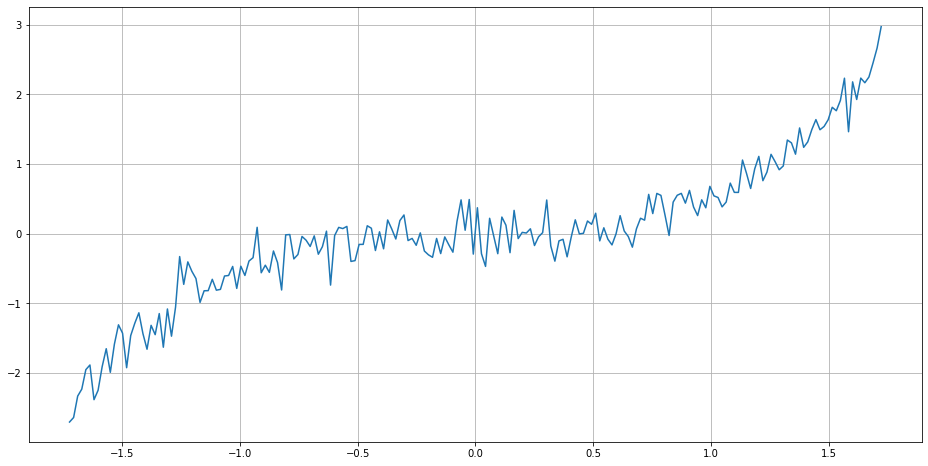

In [6]:
plt.figure(figsize=(16,8))
plt.plot(x_obs, y_obs)
plt.grid()

In [7]:
# define setting and optimizer
model = SimpleModel(dropout_rate=0.5, decay=1e-6).to(device)
criterion  = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=model.decay)

# train the model
for iter in range(20000):
    y_pred = model(torch.Tensor(x_obs).view(-1,1).to(device))
    y_true = Variable(torch.Tensor(y_obs).view(-1,1).to(device))
    optimizer.zero_grad()
    loss = criterion(y_pred, y_true)
    loss.backward()
    optimizer.step()
    
    if iter % 2000 == 0:
        print("Iter: {}, Loss: {:.4f}".format(iter, loss.item()))

Iter: 0, Loss: 0.9956
Iter: 2000, Loss: 0.3633
Iter: 4000, Loss: 0.2682
Iter: 6000, Loss: 0.2930
Iter: 8000, Loss: 0.2467
Iter: 10000, Loss: 0.2529
Iter: 12000, Loss: 0.2155
Iter: 14000, Loss: 0.2215
Iter: 16000, Loss: 0.2392
Iter: 18000, Loss: 0.1714


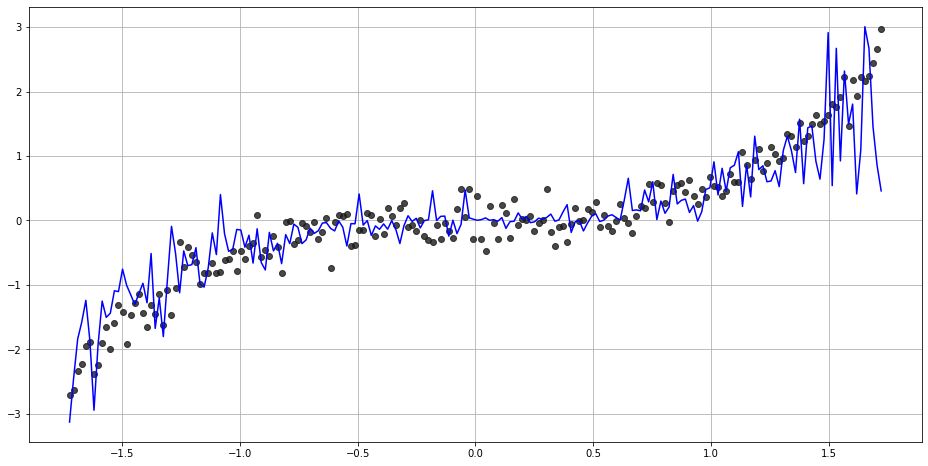

In [8]:
# plot the fit to the training data
plt.figure(figsize=(16,8))
y_pred = model(torch.Tensor(x_obs).view(-1,1).to(device))
plt.plot(x_obs, y_obs, ls="none", marker="o", color="0.1", alpha=0.8, label="observed")
plt.plot(x_obs, y_pred.cpu().detach().numpy(), ls="-", color="b", label="mean")
plt.grid()

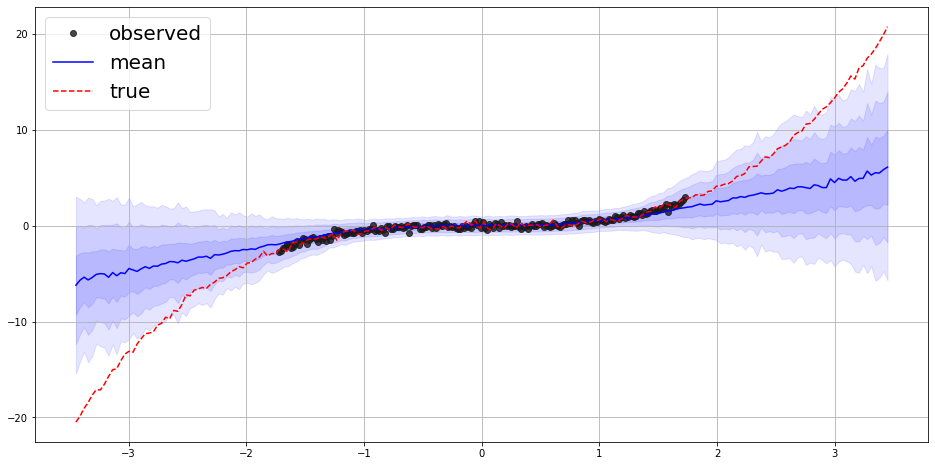

In [10]:
# estimate uncertainty
iters_uncertainty = 200
lengthscale = 0.01
n_std = 3 # number of standard deviations to plot
y_mean, y_std = uncertainity_estimate(torch.Tensor(x_test).view(-1,1).to(device), model, iters_uncertainty, lengthscale)

# plot the confidence intervals
plt.figure(figsize=(16,8))
plt.plot(x_obs, y_obs, ls="none", marker="o", color="0.1", alpha=0.8, label="observed")
plt.plot(x_test, y_mean, ls="-", color="b", label="mean")
plt.plot(x_test, y_test, ls='--', color='r', label='true')
for i in range(n_std):
    plt.fill_between( x_test,
        y_mean - y_std * ((i+1.)),
        y_mean + y_std * ((i+1.)),
        color="b",
        alpha=0.1)
plt.legend(fontsize=20)
plt.grid()

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject
* Bayesian Neural Networks (Theory)
    * Variational Inference and ELBO - <a href="https://www.youtube.com/watch?v=G6tUZRHnJYc">Yarin Gal - Part I</a>
    * Dropout as efficient Bayesian Inference - <a href="https://www.youtube.com/watch?v=7p56lnNi74s&t=5s&ab">Yarin Gal - Part II</a>
* Bayesian Neural Networks vs Dropout (Practice)
    * MNIST demonstration - <a href="https://www.youtube.com/watch?v=Puc_ujh5QZs&t=739s&ab"> Elise Jennings, Argonne National Laboratory</a>
* Evidental Deep Learning - <a href="https://www.youtube.com/watch?v=toTcf7tZK8c&ab"> MIT 6.S191 - Lecture 7</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
----
* <a href="http://mlg.eng.cam.ac.uk/yarin/blog_3d801aa532c1ce.html">What My Deep Model Doesn't Know...</a> - Yarin Gal
* <a href="http://mlg.eng.cam.ac.uk/yarin/blog_3d801aa532c1ce.html">Deep Learning Is Not Good Enough,
We Need Bayesian Deep Learning for Safe AI</a> - Alex Kendall
* <a href="http://www.cs.ox.ac.uk/people/yarin.gal/website/bdl101/">Bayesian Deep Learning 101 @ MLSS19</a> - Yarin Gal
* <a href="http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L7.pdf">Slides Lecture 7 MIT 6.S191</a> (Introduction to Deep Learning) -  Alexander Amini
* <a href="https://towardsdatascience.com/my-deep-learning-model-says-sorry-i-dont-know-the-answer-that-s-absolutely-ok-50ffa562cb0b#:~:text=There%20are%20two%20major%20different,epistemic%20uncertainty%20and%20aleatoric%20uncertainty.&text=Epistemic%20uncertainty%20describes%20what%20the,to%20limited%20data%20and%20knowledge."> Uncertainty in Deep Learning. How to Measure?</a> - Michel Kana
* <a href="#">Uncertainty Estimation in Deep Learning</a> (Slideshare) - Christian Perone
* Research papers:
    * <a href="http://proceedings.mlr.press/v37/blundell15.html">Weight Uncertainty in Neural Networks</a>
    * <a href="http://proceedings.mlr.press/v48/gal16.html">Dropout as a Bayesian Approximation: Representing Model Uncertainty in Deep Learning</a>
    * <a href="https://papers.nips.cc/paper/2017/hash/2650d6089a6d640c5e85b2b88265dc2b-Abstract.html">What Uncertainties Do We Need in Bayesian Deep Learning for Computer Vision?</a>
    * <a href="https://openaccess.thecvf.com/content_cvpr_2018/html/Kendall_Multi-Task_Learning_Using_CVPR_2018_paper.html">Multi-Task Learning Using Uncertainty to Weigh Losses for Scene Geometry and Semantics</a>
    * <a href="https://papers.nips.cc/paper/2018/hash/a981f2b708044d6fb4a71a1463242520-Abstract.html">Evidential Deep Learning to Quantify Classification Uncertainty</a>
    * <a href="https://openaccess.thecvf.com/content_CVPR_2019/html/Barron_A_General_and_Adaptive_Robust_Loss_Function_CVPR_2019_paper.html">A General and Adaptive Robust Loss Function</a>
    * <a href="https://www.nips.cc/virtual/2020/public/poster_aab085461de182608ee9f607f3f7d18f.html">Deep Evidential Regression</a>

* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
